# APPLY KNN USING SCIKIT LEARN

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_iris

# Step 1 : data loading and exploration

In [3]:
IRIS=load_iris()


In [4]:
IRIS.keys()

dict_keys(['data', 'target_names', 'DESCR', 'target', 'feature_names'])

In [5]:
import numpy as np
import matplotlib
import IPython
import scipy

In [6]:
print(IRIS ['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(IRIS['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(IRIS['target_names'])

['setosa' 'versicolor' 'virginica']


In [9]:
print(IRIS['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
type(IRIS['data'])

numpy.ndarray

In [12]:
IRIS['data'].shape

(150, 4)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Making a pair plot

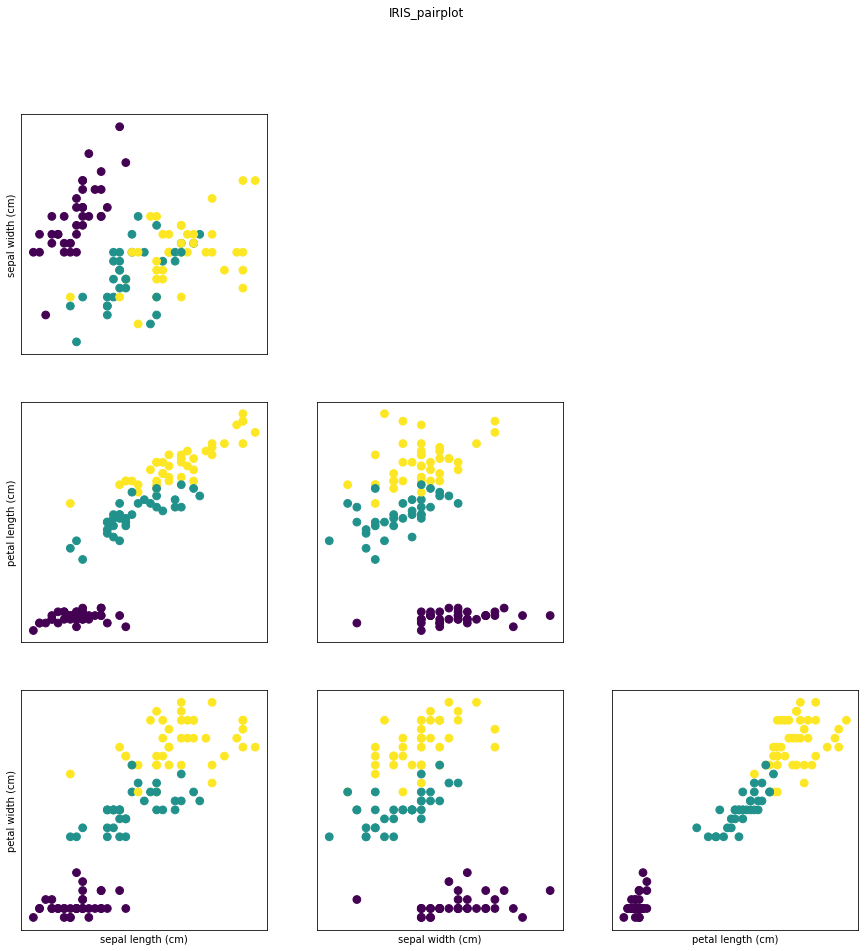

In [23]:

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("IRIS_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(IRIS['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(IRIS['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

# Step 2 : split between train and test datasets (using randomization function)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'],random_state=0)

In [15]:
X_train.shape

(112, 4)

In [16]:
X_test.shape

(38, 4)

# Step 3 : Build the knn classifier and train model on the data

In [26]:
#for knn algorithm we have to retrieve the "KNeighborsClassifier" from the "neighbors" module class (wich is
#one of the "Estimator classes" in scikit learn)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

#The knn object encapsulates the algorithm to build the model from the training data,
#as well the algorithm to make predictions on new data points.
#It will also hold the information the algorithm has extracted from the training data.
#In the case of KNeighborsClassifier , it will just store the training set.

In [27]:
#Build the model on the training set : call the the fit method of the knn object,
#which takes as arguments the numpy array X_train containing the training data and
#the numpy array y_train of the corresponding training labels:

knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
#Make predictions using the model on new data

In [29]:
#create a numpy array which has the same labels as our training data (shape number of samples TIMES the number of features)
X_new=np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [30]:
#Make predictions  calling the "predict" function of knn 
prediction=knn.predict(X_new)
prediction

array([0])

In [31]:
IRIS['target_names'][prediction]
#Our model predicts that this new iris belongs to the class 0, meaning its species is Setosa.

array(['setosa'],
      dtype='<U10')

# Step 4 : Evaluate the model performance

In [33]:
#1st method 

In [34]:
#make a prediction for an iris in the test data, and compare it against its label (the known species) : by measuring how well the model works by computing the
#accuracy, which is the fraction of flowers for which the right species was predicted :
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.97368421052631582

In [35]:
#2nd method

In [36]:
#use the score method of the knn object, which will compute the test set accuracy for us:
knn.score(X_test, y_test)

0.97368421052631582

In [37]:
#COMMENT : For this model, the test set accuracy is about 0.97, which means we made the right
#prediction for 97% of the irises in the test set. Under some mathematical assump‐tions, this means that
#we can expect our model to be correct 97% of the time for new irises.

In [ ]:
#Summary code to setup and evaluate the knn model (training and evaluation process)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'],
random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97368421052631582

In [ ]:
#apply confusion matrix to displaye another view of the model eavluation